<a href="https://colab.research.google.com/github/KillerStrike17/DeepLearning_for_NLP/blob/master/Recurrent_Neural_Network_101/Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [0]:
# Calling the gods

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Using TensorFlow backend.


## Data Generation

Generating a random set of 1000 numbers

In [0]:
step = 5
N = 1000    
Tp = 800    

# Generating data with sine curve and adding some random value to it in range[2,-2]

t=np.arange(0,N)
# print("t:- ",t)
# print(np.random.rand(N))
x=np.sin(0.02*t)+2*np.random.rand(N)
# print(len(x))
df = pd.DataFrame(x)
df.head()

,0
0,1.834616
1,1.934316
2,0.534399
3,1.758429
4,0.506432


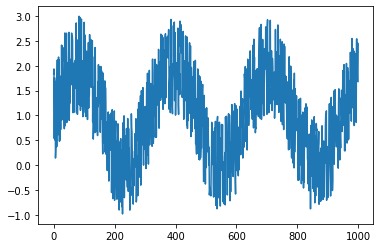

In [0]:
plt.plot(df)
plt.show()

## Dataset Generation

Splitting the data in 4 columns as step size is 4, and the target variable is fifth data 

In [0]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 # print(data)
 for i in range(len(data)-step):
  d=i+step 
  # print(d) 
  X.append(data[i:d,])
  Y.append(data[d,])
  # if i == 7:
  #   break
 return np.array(X), np.array(Y)

In [0]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]


# print(test)
# add step elements into train and test

test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
# print(train)


trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

# print(trainX)
# print(trainX.shape)
# print(trainY)
# print(trainY.shape)

# print(testX)
# print(testX.shape)
# print(testY)
# print(testY.shape)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Develop and Train the Model

Developed a simple RNN Network with loss as MSE

In [0]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="sigmoid"))
# model.add(SimpleRNN(units = 64,return_sequences=True))
# model.add(SimpleRNN(units = 32))
model.add(Dense(8, activation="sigmoid")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_18 (SimpleRNN)    (None, 32)                1216      
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(trainX,trainY,validation_data=(testX,testY), epochs=100, batch_size=32, verbose=1)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
print(testPredict.shape)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = model.evaluate(testX, testY, verbose=0)


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 3.3415 - val_loss: 1.5987
Epoch 2/100
800/800 [==============================] - 0s 139us/step - loss: 2.2805 - val_loss: 1.0820
Epoch 3/100
800/800 [==============================] - 0s 130us/step - loss: 1.6251 - val_loss: 0.7878
Epoch 4/100
800/800 [==============================] - 0s 135us/step - loss: 1.2148 - val_loss: 0.6555
Epoch 5/100
800/800 [==============================] - 0s 143us/step - loss: 0.9759 - val_loss: 0.6217
Epoch 6/100
800/800 [==============================] - 0s 135us/step - loss: 0.8418 - val_loss: 0.6402
Epoch 7/100
800/800 [==============================] - 0s 133us/step - loss: 0.7723 - val_loss: 0.6690
Epoch 8/100
800/800 [==============================] - 0s 142us/step - loss: 0.7341 - val_loss: 0.6886
Epoch 9/100
800/800 [==============================] - 0s 155us/step - loss: 0.7041 - val_loss: 0.6744
Epoch 10/100
800/800 [=======

## Outputs using various Optimizers and final Plot using RMSProp

Applied various optimizers like RMSProp, Adagrad, Adam and Adadelta to check the difference and plotted the final output using RMSProp as it gave the least error rate

In [0]:
print(trainScore) # RMSProp

0.38387733459472656


In [0]:
print(trainScore) #Adagrad

0.38390427708625796


In [0]:
print(trainScore) #Adam

0.4260824939608574


In [0]:
print(trainScore) #Adadelta

0.3889714699983597


(1000, 1)


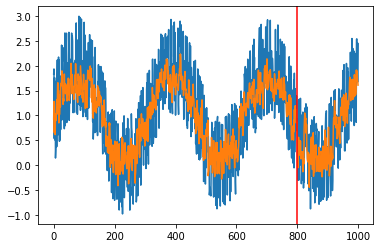

In [0]:
index = df.index.values
print(predicted.shape)
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()